In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv("C:/Users/Van Shahanov/Desktop/Programming/Python/CSV DOCS/500_Person_Gender_Height_Weight_Index.csv")

In [3]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [6]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [11]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])


In [12]:
data

,Gender,Height,Weight,Index
0,1,34,96,4
1,1,49,87,2
2,0,45,110,4
3,0,55,104,3
4,1,9,61,3
...,...,...,...,...
495,0,10,153,5
496,0,44,121,4
497,0,1,136,5
498,1,10,95,5


In [15]:
bins = (-1,0,1,2,3,4,5)
health = ['malnourished','underweight', 'fit', 'slightly overweight', 'overweight', 'extremely overweight']
data['Index'] = pd.cut(data['Index'], bins = bins, labels = health)


In [16]:
data['Index']

0                overweight
1                       fit
2                overweight
3       slightly overweight
4       slightly overweight
               ...         
495    extremely overweight
496              overweight
497    extremely overweight
498    extremely overweight
499    extremely overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): [malnourished < underweight < fit < slightly overweight < overweight < extremely overweight]

In [21]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

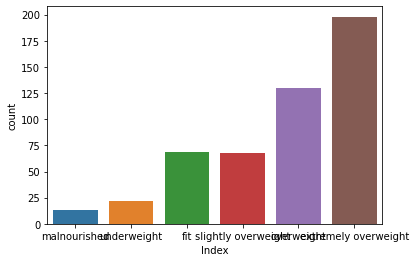

In [23]:
sns.countplot(data['Index'], height = 5, aspect = 3)

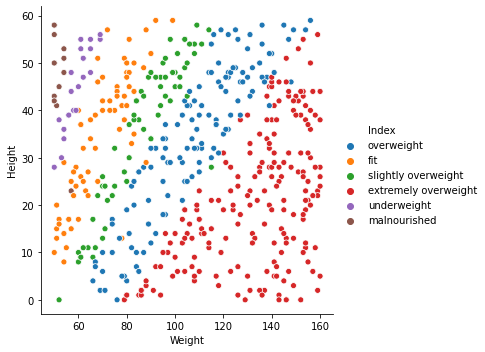

In [26]:
sns.relplot(x = "Weight", y = "Height", hue = "Index", data = data)

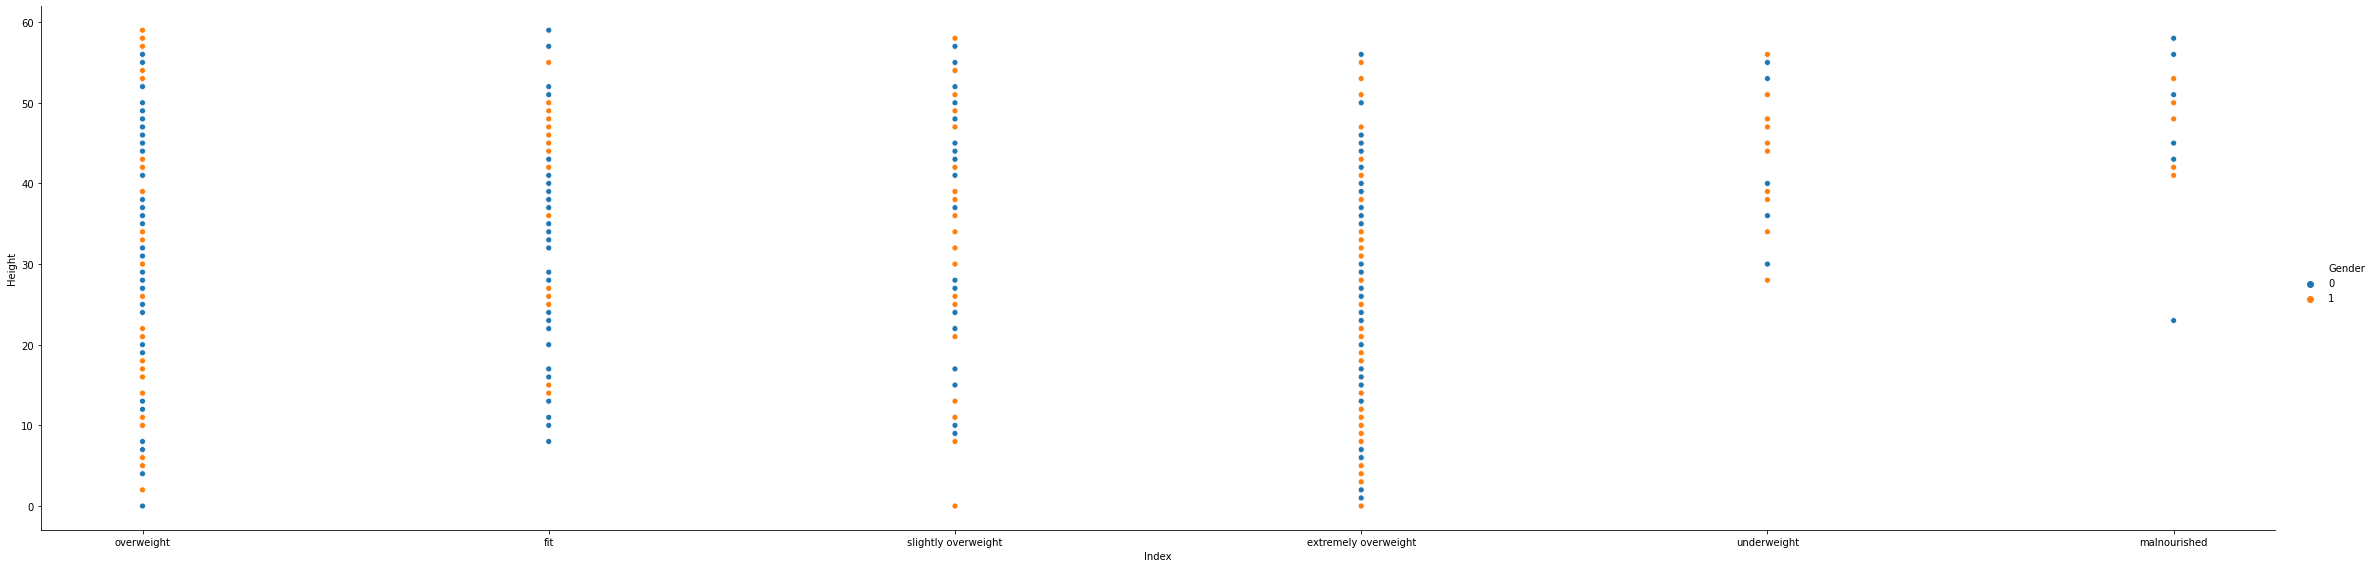

In [37]:
sns.relplot(x = "Index", y = "Height", hue = "Gender", data = data, height = 5, aspect = 3)

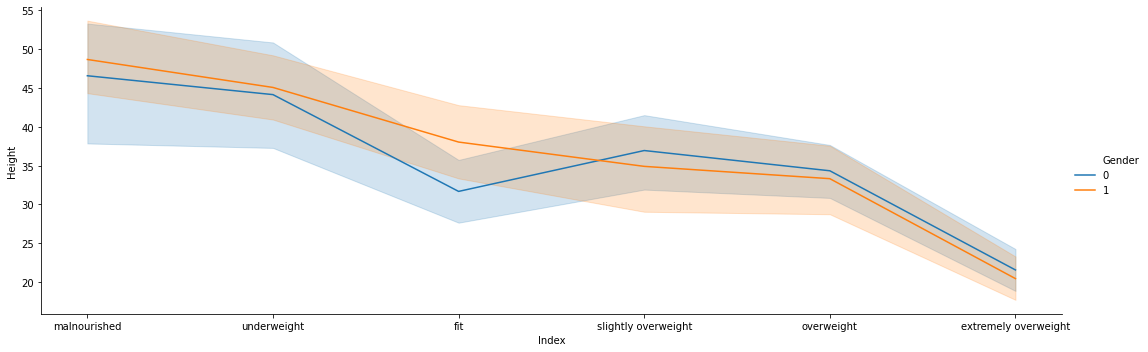

In [40]:
sns.relplot(x = "Index", y = "Height", hue = "Gender", kind = "line", data = data, height = 5, aspect = 3)

In [42]:
x = data.drop('Index', axis=1)
y = data["Index"]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [46]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [48]:
clf = svm.SVC()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

In [50]:
print(classification_report(y_test, pred))

                      precision    recall  f1-score   support

extremely overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
        malnourished       0.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
 slightly overweight       0.78      0.93      0.85        15
         underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



In [52]:
print(confusion_matrix(y_test, pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [53]:
print(accuracy_score(y_test, pred))

0.85


In [59]:
a = [[0,100,20]]
a = s.transform(a)
b = clf.predict(a)

In [60]:
b

array(['overweight'], dtype=object)

In [56]:
data

,Gender,Height,Weight,Index
0,1,34,96,overweight
1,1,49,87,fit
2,0,45,110,overweight
3,0,55,104,slightly overweight
4,1,9,61,slightly overweight
...,...,...,...,...
495,0,10,153,extremely overweight
496,0,44,121,overweight
497,0,1,136,extremely overweight
498,1,10,95,extremely overweight
